In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import joblib

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [2]:
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')

true_df['True']=1
false_df['True']=0

combined_df = pd.concat([true_df, false_df], ignore_index=True)

combined_df = combined_df.sample(frac=1).reset_index(drop=True)


In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

In [4]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(combined_df['cleaned_text'])

# Encode 'subject' column
le = LabelEncoder()
subject_encoded = le.fit_transform(combined_df['subject'])
subject_encoded = subject_encoded.reshape(-1, 1)

# Combine TF-IDF features with 'subject' feature
X = np.hstack((X_tfidf.toarray(), subject_encoded))

# Target variable
y = combined_df['True']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)


In [16]:
models = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    
}
#logistic regression: 
# Define parameter grids for Grid Search
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    
}

In [21]:
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    
}

# Define parameter grids for Grid Search
param_grids = {
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    
}

Accuracy: 0.999109

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4728
           1       1.00      1.00      1.00      4252

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



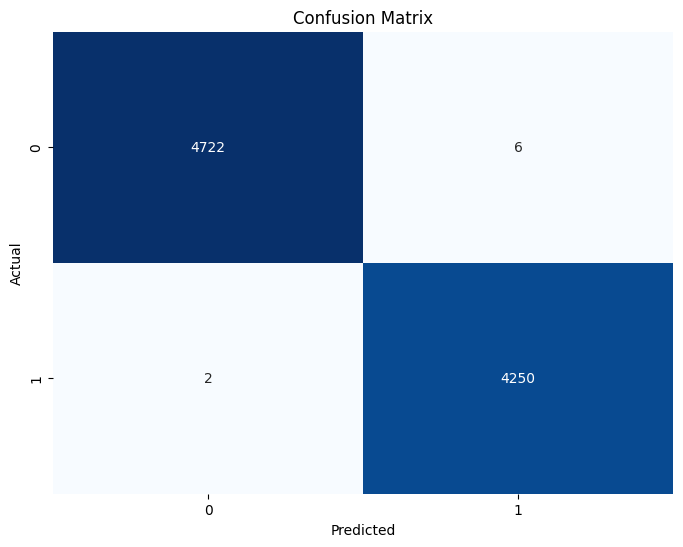

In [13]:
mo=RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200)
mo.fit(X_train, y_train)
y_pred = mo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
lr = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [7]:
sv=SVC(C=10, kernel='rbf', probability=True)
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [17]:
#size of the data
print(X_train_subset.shape)
print(y_train_subset.shape)

(17959, 5001)
(17959,)



Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression model saved as 'Logistic Regression_best_model.pkl'
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
cv:  [1. 1. 1. 1. 1.]
Logistic Regression Cross-Validation Accuracy: 1.0
predict
Logistic Regression Accuracy: 0.9983296213808464
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4609
           1       1.00      1.00      1.00      4371

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Logistic Regression ROC-AUC: 0.9997822886289885


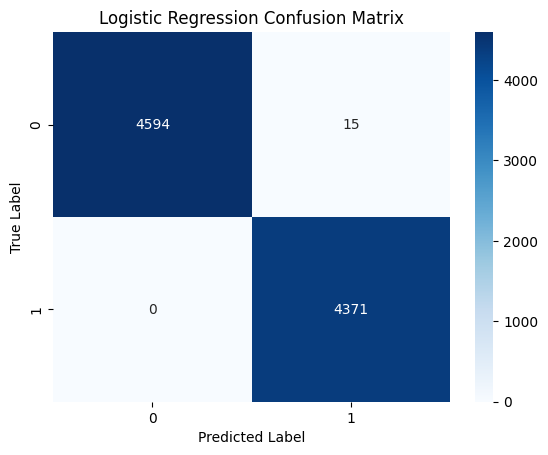

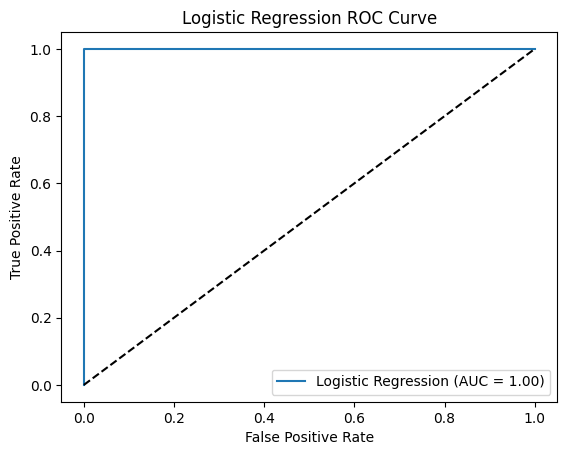


Training XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [19]:
best_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1,n_jobs=2)
    grid_search.fit(X_train_subset, y_train_subset)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    joblib.dump(best_model, f'{name}_best_model.pkl')
    print(f"{name} model saved as '{name}_best_model.pkl'")
    print(f"Best Parameters: {grid_search.best_params_}")
    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X, y, cv=5)
    print("cv: ",cv_scores)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean()}")
    print("predict")
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluation
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = best_model.decision_function(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{name} ROC-AUC: {roc_auc}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
for name, model in best_models.items():
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        feature_names = tfidf.get_feature_names_out()
        
        # Combine TF-IDF and subject feature names
        combined_feature_names = list(feature_names) + ['subject']
        
        # Plot feature importances
        importance_df = pd.DataFrame({
            'Feature': combined_feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title(f'{name} Top 20 Feature Importances')
        plt.show()